## Desc
In this notebook I am going to explore the data from the Kenya Traffic Accidents dataset. I will be looking at the data and trying to find some interesting insights. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('data\kenya-accidents-database.xlsx')
df.head()

,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,BRIEF ACCIDENT DETAILS,GENDER,AGE,CAUSE CODE,VICTIM,NO.,Date DD/MM/YYYY,Unnamed: 12
0,630,KITUI,MAKUENI,KITUI-ITHOKWE,KITUI SCHOOL,HEAD ON COLLISION,M,26,7.0,M/CYCLIST,1,2016-06-25,so MM/DD/YYYY is the solution :)
1,830,VOI,TAITA TAVETA,MOMBASA-NAIROBI,IKANGA,HEAD ON COLLISION,M,28,25.0,M/CYCLIST,1,2016-06-25,NaN
2,1330,MARIAKANI,KILIFI,MOMBASA-NAIROBI,KATOLANI,THE UNKNOWN M/V HIT THE MOTOR CYCLE,M,A & J,98.0,M/CYCLIST,1,2016-06-25,NaN
3,2100,ONGATA RONGAI,NAKURU,NAKURU-NAIROBI,MAASAI LODGE,THE VEHICLE KNOCKED DOWN A PEDESTRIAN WHO WAS ...,M,65,29.0,PEDESTRIAN,1,2016-06-25,NaN
4,1900,MATUU,MACHAKOS,MATUU-MWINGI,KIVANDINI,THE VEHICLE OVERTOOK A M/CYCLE AND LOST CONTRO...,M,A,10.0,PASSENGER,1,2016-06-25,NaN


In [2]:
# We dont need unnamed12 column so we are going to remove it
df.drop('Unnamed: 12', axis=1, inplace=True)
df.head()

,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,BRIEF ACCIDENT DETAILS,GENDER,AGE,CAUSE CODE,VICTIM,NO.,Date DD/MM/YYYY
0,630,KITUI,MAKUENI,KITUI-ITHOKWE,KITUI SCHOOL,HEAD ON COLLISION,M,26,7.0,M/CYCLIST,1,2016-06-25
1,830,VOI,TAITA TAVETA,MOMBASA-NAIROBI,IKANGA,HEAD ON COLLISION,M,28,25.0,M/CYCLIST,1,2016-06-25
2,1330,MARIAKANI,KILIFI,MOMBASA-NAIROBI,KATOLANI,THE UNKNOWN M/V HIT THE MOTOR CYCLE,M,A & J,98.0,M/CYCLIST,1,2016-06-25
3,2100,ONGATA RONGAI,NAKURU,NAKURU-NAIROBI,MAASAI LODGE,THE VEHICLE KNOCKED DOWN A PEDESTRIAN WHO WAS ...,M,65,29.0,PEDESTRIAN,1,2016-06-25
4,1900,MATUU,MACHAKOS,MATUU-MWINGI,KIVANDINI,THE VEHICLE OVERTOOK A M/CYCLE AND LOST CONTRO...,M,A,10.0,PASSENGER,1,2016-06-25


## Data Cleaning

In [10]:
# Check for null values
df.isnull().sum()

TIME 24 HOURS             2
BASE/SUB BASE             0
COUNTY                    2
ROAD                      0
PLACE                     0
BRIEF ACCIDENT DETAILS    1
GENDER                    0
AGE                       0
CAUSE CODE                6
VICTIM                    0
NO.                       0
Date DD/MM/YYYY           0
dtype: int64

In [11]:
# Since the number of null values is very small we can drop them.
# But we can also try and fill them. Here is how we can approach it.
# First we need to check the rows with null values
df[df.isnull().any(axis=1)]

,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,BRIEF ACCIDENT DETAILS,GENDER,AGE,CAUSE CODE,VICTIM,NO.,Date DD/MM/YYYY
121,1530,KAYOLE,NAIROBI,KANGUNDO,KAMULU,THE VEHICLE KNOCKED DOWN THE VICTIM,F,A,NaN,PEDESTRIAN,1,2016-06-07
163,815,BOMET,BOMET,BOMET NAROK,MULOT,HEAD ON COLLISION,M,A,NaN,DRIVER,1,2016-04-30
164,NaN,VOI,TAITA TAVETA,MWATATE VOI,CKAHARELI,HEAD ON COLLISION,M,A,8.0,M/CYCLIST,1,2016-04-30
165,NaN,VOI,TAITA TAVETA,MWATATE VOI,CKAHARELI,HEAD ON COLLISION,M,A,8.0,P/PASENGER,1,2016-04-30
169,2100,SALAMA,MAKUENI,NAIROBI MOMBASA,KIONGWANI,NaN,M,A,NaN,DRIVER,1,2016-04-30
189,1210,HOMA BAY,HOMA BAY,RODI KOPANY RANGWE,TAUSI,THE VEHICLE KNOCKED DOWN THE VICTIM WHILE CROS...,F,11,NaN,PEDESTRIAN,1,2016-04-26
193,800,EMBAKASI,NAIROBI,MOMBASA,CABANAS,THE LORRY KNOCKED DOWN THE M/CYCLIST,M,A,NaN,P/PASSENGER,1,2016-04-26
326,2205,NANYUKI,NaN,KINAMBA,NGARUA,THE VEHICLE OVERTURNED KILLING 6 VICTIMS,4F & INF,A,26.0,PASSENGER,6,2016-04-08
328,2142,KINANGOP,NaN,NJAMBINI OLKALAO,KAMAGUTA,THE VEHICLE HIT A PEDAL CYCLIST,M,33,98.0,P/CYCLIST,1,2016-04-08
362,800,NYERI,NYERI,NYERI OTHAYA,NGURA BRIDGE,THE VEHICLE LOST CONTROL AND PLUGGED INTO THE ...,M,A,NaN,PASSENGER,1,2016-04-02


### Inferences
The most important to consider before filling out any information is domain knowledge. In this case, I have no domain knowledge of the data, but there are some things we can tell.
* We know the counties that are in Kenya
* We can see Cause code has more missing values than the other columns. So i think cause code means the reason for the accident. So we can fill the missing values with the most common cause code. This is why domain knowledge is important. You need to know what the data means.
* See at 326 we have an age column with a value(4F & INF). We shall need to clean this up. So which means there might be some other noise in the data. We can use regex to clean this up.


In [12]:
# So lets start to deal with the null values
# As i noted, cause code has more null values than the other columns
# Lets use mode to check the most common cause code
df['CAUSE CODE'].mode()

0    98.0
Name: CAUSE CODE, dtype: float64

In [13]:
# 98.0 is the most common cause code. So we can fill the null values with 98.0 because we are assuming that the null values are the same as the most common cause code
#df['CAUSE CODE'].fillna(98.0, inplace=True)
# Most will say the above code is a bad practice of programming. So lets try another way
df['CAUSE CODE'] = df['CAUSE CODE'].fillna(98.0)
df.isnull().sum()

TIME 24 HOURS             2
BASE/SUB BASE             0
COUNTY                    2
ROAD                      0
PLACE                     0
BRIEF ACCIDENT DETAILS    1
GENDER                    0
AGE                       0
CAUSE CODE                0
VICTIM                    0
NO.                       0
Date DD/MM/YYYY           0
dtype: int64

Remember we had some county information missing for Nanyuki and Kinangop. A quick google search yielded that 
Nanyuki is a town located in Laikipia County, Kenya.
Kinangop is a town located in Nyandarua County, Kenya.

In [18]:
# So we can use this to fill the missing county information. To do this, we will consider the two columns SUB BASE and COUNTY
# Where BASE/SUB BASE is Nanyuki, we will fill the missing county information with Laikipia County
# Where BASE/SUB BASE is Kinangop, we will fill the missing county information with Nyandarua County
df.loc[df['BASE/SUB BASE'] == "NANYUKI", 'COUNTY'] = "LAIKIPIA"
df.loc[df['BASE/SUB BASE'] == "KINANGOP", 'COUNTY'] = "NYANDARUA"
df.isnull().sum()

TIME 24 HOURS             2
BASE/SUB BASE             0
COUNTY                    0
ROAD                      0
PLACE                     0
BRIEF ACCIDENT DETAILS    1
GENDER                    0
AGE                       0
CAUSE CODE                0
VICTIM                    0
NO.                       0
Date DD/MM/YYYY           0
dtype: int64

In [19]:
# Now we can drop the rest of the null values
df = df.dropna()
df.isnull().sum()

TIME 24 HOURS             0
BASE/SUB BASE             0
COUNTY                    0
ROAD                      0
PLACE                     0
BRIEF ACCIDENT DETAILS    0
GENDER                    0
AGE                       0
CAUSE CODE                0
VICTIM                    0
NO.                       0
Date DD/MM/YYYY           0
dtype: int64

# EDA
First I'd like to note that the data is pretty small. About 375 rows. To make our analysis more robust, we can convert the data to a time series and then do some analysis on the time series.

In [22]:
df.sample(10)

,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,BRIEF ACCIDENT DETAILS,GENDER,AGE,CAUSE CODE,VICTIM,NO.,Date DD/MM/YYYY
90,1100,KITALE,TRANS NZOIA,KITALE-ELDORET,KEPHIS,HEAD ON COLLISION,F,J,26.0,PASSENGER,1,2016-06-11
176,815,KILIFI,KILIFI,KILIFI VITENGENI,EZAMOYO AREA,THE KMDG 044E RAMMED INTO THE VEHICLE AND THEN...,M,23 & 27,10.0,M/CYCLIST,2,2016-04-29
115,2200,DIANI,KWALE,LUNGALUNGA VANGA,LUNGALUNGA SHOPPING CENTRE,THE KMDK HIT THE REAR OF THE OTHER CYCLE,M,17,10.0,P/PASSENGER,1,2016-06-08
263,1300,NAROK,NAROK,MULOT NAROK,KUTETE,THE VEHICLE KNOCKED DOWN THE VICTIM WHILE CROS...,F,12,60.0,PEDESTRIAN,1,2016-04-15
217,2030,KIKUYU,KIAMBU,SOUTHERN BY PASS,NEAR KIKUYU FLY OVER,THE VEHICLE LOST CONTROL VEERED OFF THE ROAD A...,M,27,26.0,PEDESTRIAN,1,2016-04-22
14,1150,NAKURU,NAKURU,NAKURU NAIROBI,NEAR TUSKYS SUPERMARKET,THE VEHICLE KNOCKED DOWN THE M/CYCLIST,M,35,57.0,M/CYCLIST,1,2016-06-23
214,1230,NAKURU,MAKURU,NAKURU NAIROBI,BAHATI JUNCTION,THE VEHICLE KNOCKED DOWN THE VICTIM WHILE CROS...,M,28,66.0,PEDESTRIAN,1,2016-04-22
67,1800,DTEO LANGATA,NAIROBI,SOUTHERN BY PASS,CHINESE CONSTRUCTION SITE,THE BUS KNOCKED DOWN THE VICTIM WHO WAS CROSSI...,M,30,60.0,PEDESTRIAN,1,2016-06-15
91,1300,CHANGAMWE,MOMBASA,MOMBASA-NAIROBI,BANGLA AREA,THE VEHICLE KNOCKED DOWN A PEDESTRIAN WHO WAS ...,M,36,10.0,PEDESTRIAN,1,2016-06-11
179,1900,KEROKA,NYAMIRA,KEROKA SOTIK,KISAURI AREA,THE CYCLE HIT THE VEHICLE,M,28,52.0,M/CYCLIST,1,2016-04-29


In [67]:
#df['TIME 24 HOURS'] = pd.to_datetime(df['TIME 24 HOURS'], infer_datetime_format=True)

In [25]:
# SO we need to convert the date column to datetime
df['Date DD/MM/YYYY'] = pd.to_datetime(df['Date DD/MM/YYYY'], infer_datetime_format = True)



In [27]:
# check the dtypes
df.dtypes

TIME 24 HOURS                     object
BASE/SUB BASE                     object
COUNTY                            object
ROAD                              object
PLACE                             object
BRIEF ACCIDENT DETAILS            object
GENDER                            object
AGE                               object
CAUSE CODE                       float64
VICTIM                            object
NO.                                int64
Date DD/MM/YYYY           datetime64[ns]
dtype: object

_Converting the date column to a datetime type in pandas allows you to perform a wide range of time-based operations and analyses on your data. Here are a few examples of what you can do with a datetime column:_

* Resampling: You can use the resample() method to aggregate your data by different time periods, such as days, weeks, months, or years. For example, you can use this to calculate the total number of accidents per month or the average number of accidents per week.

* Time-based indexing: You can use the datetime column as the index of your dataframe, which makes it easy to perform time-based filtering and slicing. For example, you can select all the rows that correspond to a specific year or month.

* Time series analysis: With a datetime column, you can perform time series analysis on your data. This can include decomposing time series data into trend, seasonality, and residuals.

* Time-based plotting: You can use the datetime column to create time-based plots, such as line charts or bar charts that show how your data changes over time.

* Time-based groupby: You can group your data by time-based attributes such as day, month, and year and perform aggregate functions such as mean, median, and sum on the grouped data.

* Time-based filtering: You can filter your data based on time-based attributes such as day, month, and year.

In [28]:
# Now we can start using various time series methods
# Lets make the date column the index,which makes it easy to perform time-based filtering and slicing.
df.set_index('Date DD/MM/YYYY', inplace=True)
df.head()

,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,BRIEF ACCIDENT DETAILS,GENDER,AGE,CAUSE CODE,VICTIM,NO.
Date DD/MM/YYYY,,,,,,,,,,,
2016-06-25,630,KITUI,MAKUENI,KITUI-ITHOKWE,KITUI SCHOOL,HEAD ON COLLISION,M,26,7.0,M/CYCLIST,1
2016-06-25,830,VOI,TAITA TAVETA,MOMBASA-NAIROBI,IKANGA,HEAD ON COLLISION,M,28,25.0,M/CYCLIST,1
2016-06-25,1330,MARIAKANI,KILIFI,MOMBASA-NAIROBI,KATOLANI,THE UNKNOWN M/V HIT THE MOTOR CYCLE,M,A & J,98.0,M/CYCLIST,1
2016-06-25,2100,ONGATA RONGAI,NAKURU,NAKURU-NAIROBI,MAASAI LODGE,THE VEHICLE KNOCKED DOWN A PEDESTRIAN WHO WAS ...,M,65,29.0,PEDESTRIAN,1
2016-06-25,1900,MATUU,MACHAKOS,MATUU-MWINGI,KIVANDINI,THE VEHICLE OVERTOOK A M/CYCLE AND LOST CONTRO...,M,A,10.0,PASSENGER,1


Resampling: You can use the resample() method to aggregate your data by different time periods, such as days, weeks, months, or years.

In [33]:
# We are dealing with only one year of data. So we can use resample to get the monthly data
df.resample('M').sum()

C:\Users\JINEF\AppData\Local\Temp\ipykernel_9792\3881588739.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,CAUSE CODE,NO.
Date DD/MM/YYYY,,
2016-04-30,10282.0,235
2016-05-31,0.0,0
2016-06-30,7836.0,195


In [34]:
# Weekley data
df.resample('W').sum()

C:\Users\JINEF\AppData\Local\Temp\ipykernel_9792\703939550.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,CAUSE CODE,NO.
Date DD/MM/YYYY,,
2016-04-03,1009.0,26
2016-04-10,2730.0,69
2016-04-17,2528.0,54
2016-04-24,1915.0,53
2016-05-01,2100.0,33
2016-05-08,0.0,0
2016-05-15,0.0,0
2016-05-22,0.0,0
2016-05-29,0.0,0


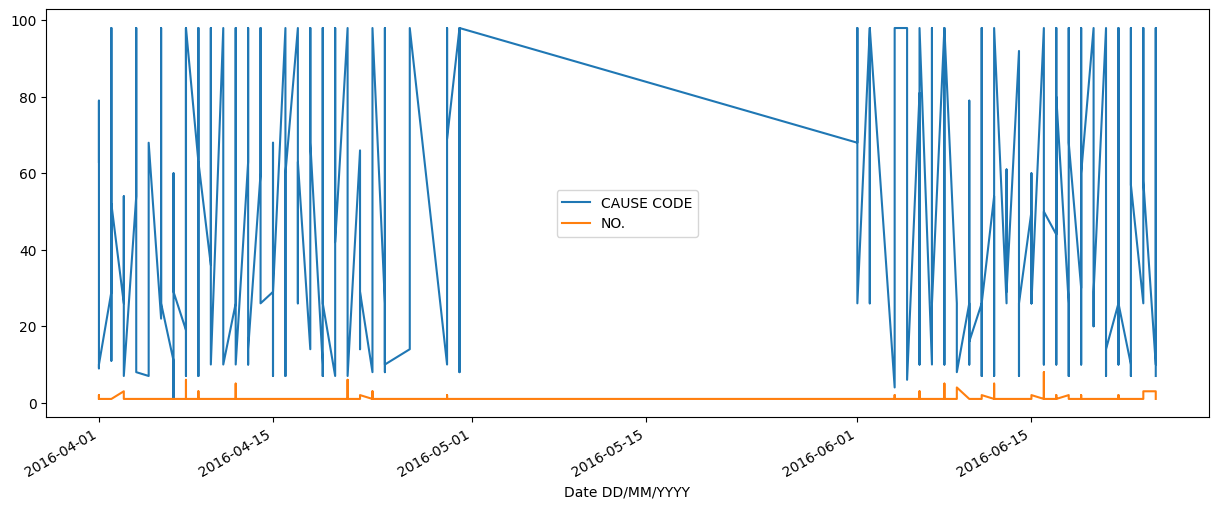

In [47]:
# time series analysis
df.plot(figsize=(15, 6))
plt.show()
 


In [54]:
'''Index(['TIME 24 HOURS', 'BASE/SUB BASE', 'COUNTY', 'ROAD', 'PLACE',
       'BRIEF ACCIDENT DETAILS', 'GENDER', 'AGE', 'CAUSE CODE', 'VICTIM',
       'NO.'],
      dtype='object')'''
# we can also use plotly to plot the data
import plotly.express as px
fig = px.line(df, x=df.index, y='NO.', title='Accidents in Kenya')
fig.show()

In [56]:
# Time-based groupby:
df.groupby(df.index.month).mean()


C:\Users\JINEF\AppData\Local\Temp\ipykernel_9792\2644074602.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,CAUSE CODE,NO.
Date DD/MM/YYYY,,
4,48.50000,1.108491
6,48.07362,1.196319


C:\Users\JINEF\AppData\Local\Temp\ipykernel_9792\4133831283.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<AxesSubplot: xlabel='Date DD/MM/YYYY,COUNTY'>

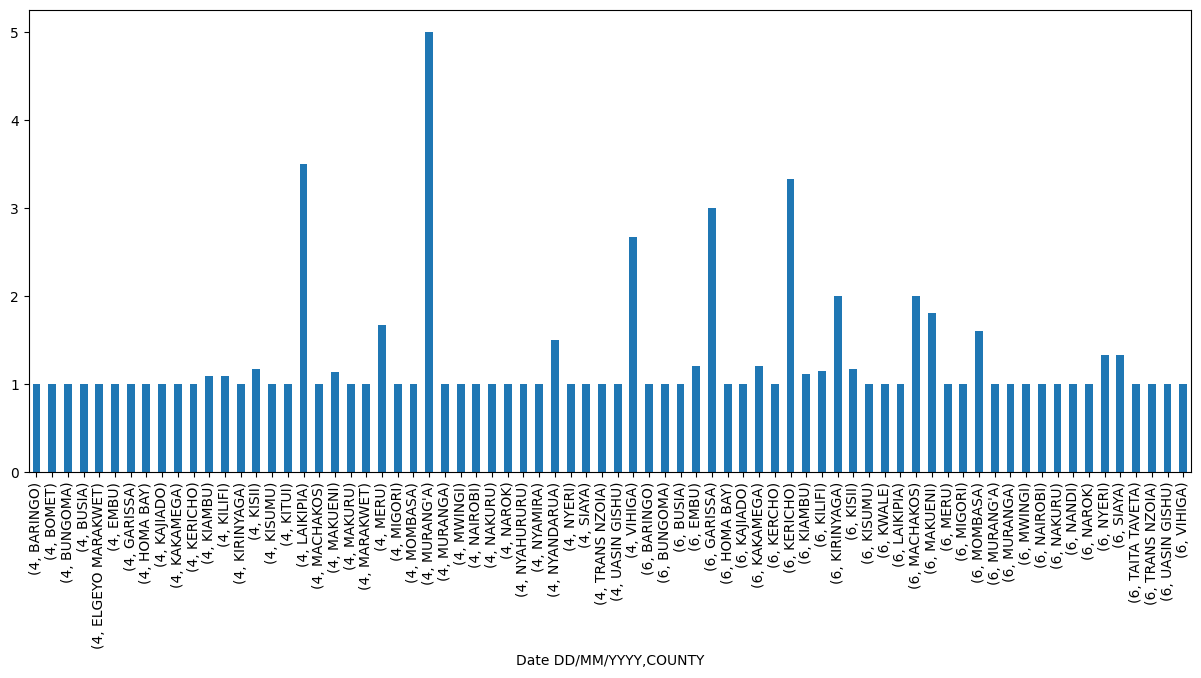

In [76]:
# accidents per county per month
df.groupby([df.index.month, 'COUNTY']).mean()['NO.'].plot(kind='bar', figsize=(15, 6))